<a href="https://colab.research.google.com/github/thinhnguyen2026/BUS310/blob/main/Group_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ISLP
import pandas as pd  # for data analysis
import numpy as np  # for data analysis
import matplotlib.pyplot as plt  # for visualization
import seaborn as sns  # for better looking visualization
import scipy.stats as stats
import statsmodels.api as sm  # Library for statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.stats.anova import anova_lm

# Additional libraries and functions
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

# Mount google drive
from google.colab import drive
drive.mount('/content/drive')


import os


# List files and directories in the specified path
os.listdir('/content/drive/My Drive/BUS 310/Data_BUS310')


# Correct path to your CSV file
file_path = '/content/drive/My Drive/BUS 310/Data_BUS310/housing_price_full_sample.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to confirm successful loading
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## **1. Data Orginazing**

In [ ]:
missing_values = df.isnull().sum()
missing_values = missing_values [missing_values > 0]
print(missing_values)


MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64


2. Input missing value


In [ ]:
from sklearn.impute import SimpleImputer

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns


In [ ]:
# For numeric columns: Impute with mean
imputer_num = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])

# For categorical columns: Impute with most frequent value
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# Check for missing values
missing_values = df.isnull().sum()

# Filter to show only variables with missing values
missing_values = missing_values[missing_values > 0]

# Display the variables with missing values
print(missing_values)

Series([], dtype: int64)


## **Convert categorical variables to dummies**

In [ ]:
# Select categorical variables
categorical_vars = df.select_dtypes(include=['object', 'category'])

# Get the names of categorical variables
categorical_var_names = categorical_vars.columns.tolist()

# Display the names of categorical variables
print('Categorical Variables:', categorical_var_names)

# Count the number of categorical variables
num_categorical_vars = len(categorical_var_names)
print('Number of Categorical Variables:', num_categorical_vars)

# Convert categorical variables to numerical format using one-hot encoding
# Create dummy variables without dropping original columns
dummies = pd.get_dummies(df[categorical_var_names], drop_first=False)

# Concatenate the original DataFrame with the dummy variables
df = pd.concat([df, dummies], axis=1)

# Display the first few rows of the updated DataFrame
print(df.head())

Categorical Variables: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Number of Categorical Variables: 43
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1.0        60.0       RL         65.0   8450.0   Pave  Grvl      Reg   
1  2.0        20.0       RL         80.0   9600.0   Pave  Grvl      Reg   
2  3.0        60.0       RL         68.0  11250.0   Pave  Grvl      IR1   
3  4.0        70.0       RL         60.0   9550.0   Pave  Grv

In [ ]:
# Convert the specified columns to dummy variables
# Create dummy variables without dropping the original columns
# List of categorical variable names (excluding YrSold)
categorical_var_names = ['MSSubClass', 'MoSold', 'YrSold', 'YearBuilt']

# Create dummy variables for specified columns without dropping YrSold
df = pd.get_dummies(df, columns=categorical_var_names, drop_first=False)

## 2.	Exploratory Data Analysis

In [ ]:
# Descriptive statistics for SalePrice
sale_price_desc = df['SalePrice'].describe().round(2)

# Displaying descriptive statistics
sale_price_desc

,SalePrice
count,2919.00
mean,180052.86
std,57381.56
min,34900.00
25%,154795.00
50%,176735.00
75%,191896.00
max,755000.00


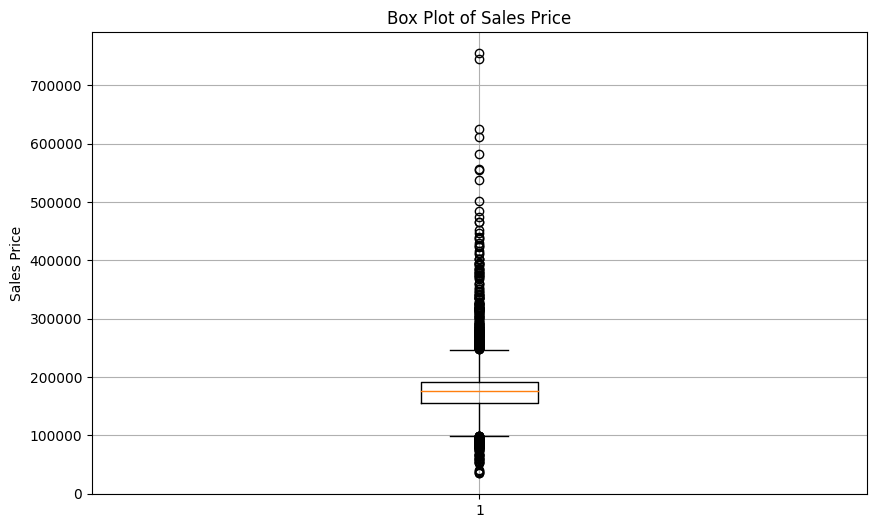

In [ ]:
# Calculate quartiles for SalePrice and create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['SalePrice'])

# Add title and labels
plt.title('Box Plot of Sales Price')
plt.ylabel('Sales Price')

# Add gridlines and display the plot
plt.grid()
plt.show()

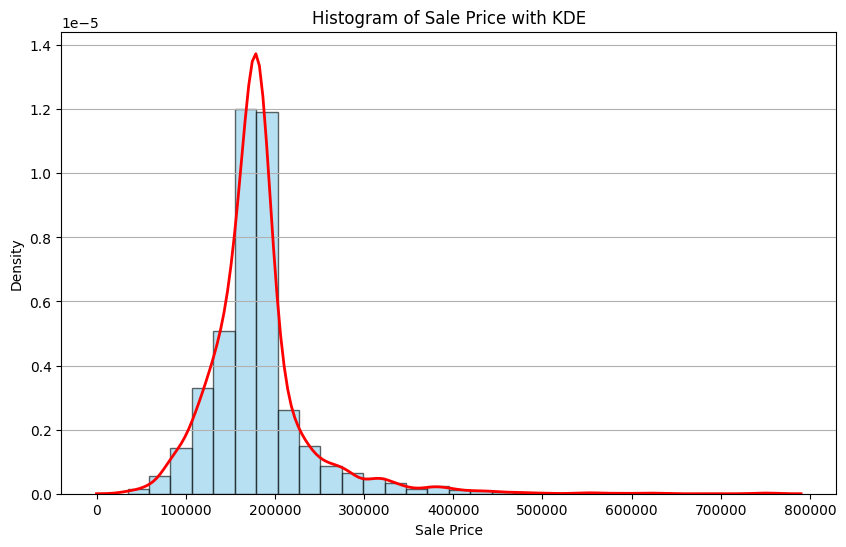

In [ ]:
# Plot histogram with KDE (Kernel Density Estimate)
plt.figure(figsize=(10, 6))

# Create a histogram of 'SalePrice'
Count, bins, ignored = plt.hist(df['SalePrice'], bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.6)

# Add a smooth KDE line
kde = sns.kdeplot(df['SalePrice'], color='red', lw=2)

# Title and labels for the plot
plt.title('Histogram of Sale Price with KDE')
plt.xlabel('Sale Price')
plt.ylabel('Density')

# Add gridlines and display the plot
plt.grid(axis='y')
plt.show()

In [ ]:
# Check how many numerical variables are in the dataset
numeric_vars = df.select_dtypes(include='number')

# Display the first few rows of the numerical variables
print(numeric_vars.head())

    Id  LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  \
0  1.0         65.0   8450.0          7.0          5.0        2003.0   
1  2.0         80.0   9600.0          6.0          8.0        1976.0   
2  3.0         68.0  11250.0          7.0          5.0        2002.0   
3  4.0         60.0   9550.0          7.0          5.0        1970.0   
4  5.0         84.0  14260.0          8.0          5.0        2000.0   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  GarageCars  GarageArea  \
0       196.0       706.0         0.0      150.0  ...         2.0       548.0   
1         0.0       978.0         0.0      284.0  ...         2.0       460.0   
2       162.0       486.0         0.0      434.0  ...         2.0       608.0   
3         0.0       216.0         0.0      540.0  ...         3.0       642.0   
4       350.0       655.0         0.0      490.0  ...         3.0       836.0   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0

In [ ]:
# Calculate correlation matrix with pairwise complete observations
cor_num_var = numeric_vars.corr()

# Display the correlation matrix
print(cor_num_var)

                     Id  LotFrontage   LotArea  OverallQual  OverallCond  \
Id             1.000000    -0.025235 -0.040746    -0.029771    -0.002839   
LotFrontage   -0.025235     1.000000  0.364382     0.204190    -0.068350   
LotArea       -0.040746     0.364382  1.000000     0.100541    -0.035617   
OverallQual   -0.029771     0.204190  0.100541     1.000000    -0.093847   
OverallCond   -0.002839    -0.068350 -0.035617    -0.093847     1.000000   
YearRemodAdd  -0.050438     0.085608  0.021612     0.571532     0.047654   
MasVnrArea    -0.025126     0.202210  0.125354     0.430961    -0.135752   
BsmtFinSF1    -0.016945     0.203603  0.194021     0.281704    -0.050403   
BsmtFinSF2     0.018249     0.041396  0.084055    -0.042755     0.041489   
BsmtUnfSF     -0.014451     0.104971  0.021361     0.275072    -0.138162   
TotalBsmtSF   -0.024922     0.331031  0.254125     0.549087    -0.173952   
1stFlrSF      -0.008678     0.424147  0.332460     0.479152    -0.157418   
2ndFlrSF    

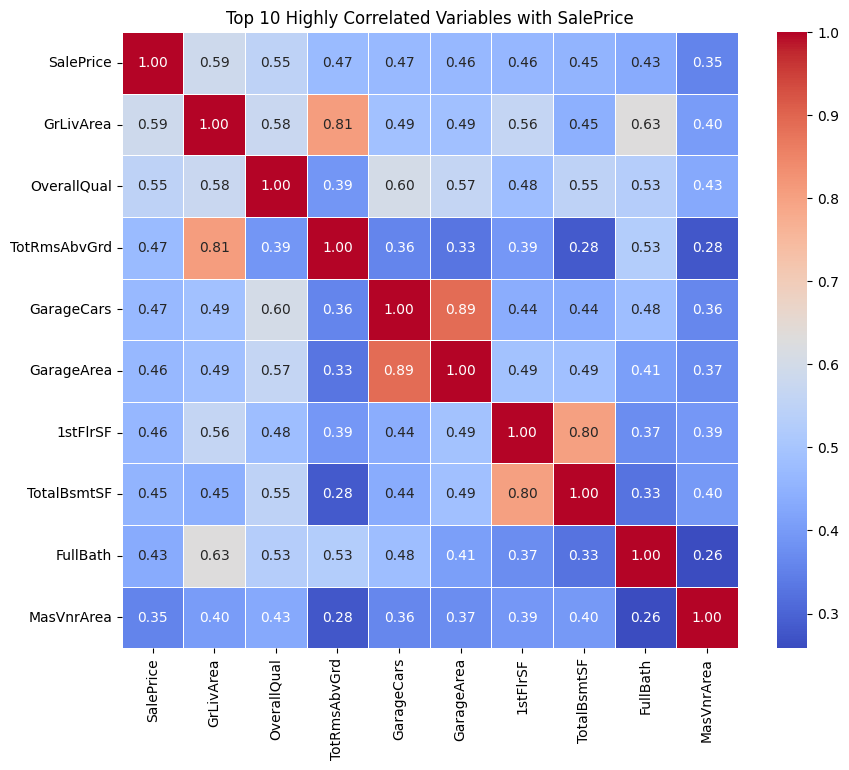

In [ ]:
# Sort correlations with SalePrice in descending order
cor_sorted = cor_num_var['SalePrice'].sort_values(ascending=False)

# Select top 10 high correlations (absolute values)
top_10_cor_high = cor_sorted.head(10)  # Get the top 10

# Create a sub-correlation matrix with only top correlations
cor_num_var_high = cor_num_var.loc[top_10_cor_high.index, top_10_cor_high.index]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cor_num_var_high, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True, square=True)

# Add title and show the plot
plt.title('Top 10 Highly Correlated Variables with SalePrice')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


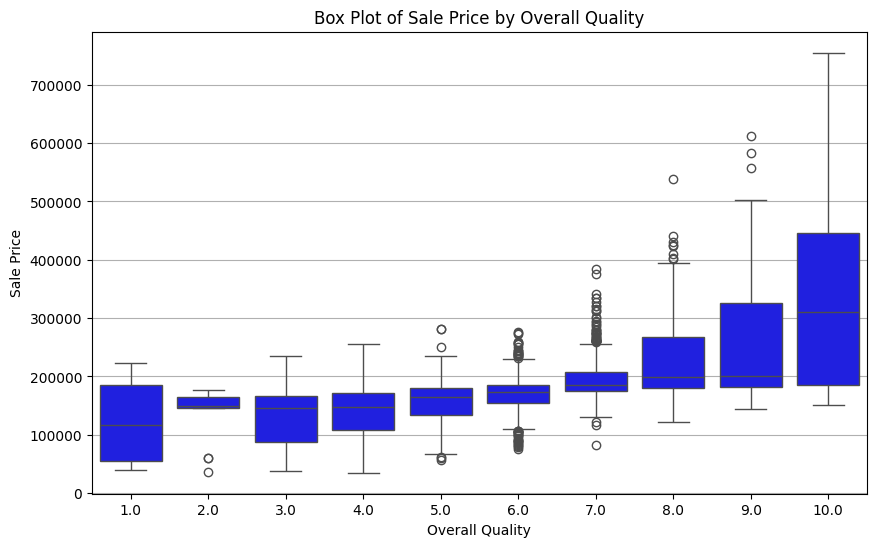

In [ ]:
# Filter the data to include only rows where 'SalePrice' is not missing
filtered_data = df[df['SalePrice'].notna()]

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=filtered_data, color='blue')

# Labeling the axes
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')

# Add title
plt.title('Box Plot of Sale Price by Overall Quality')

# Show gridlines
plt.grid(axis='y')

# Show the plot
plt.show()

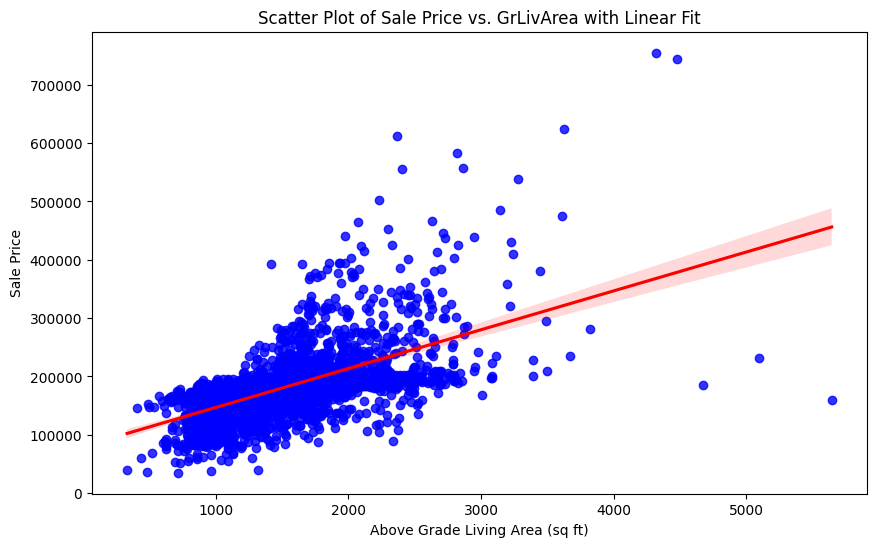

In [ ]:
# Filter the data to include rows where 'GrLivArea' and 'SalePrice' are not missing
filtered_data = df[df['GrLivArea'].notna() & df['SalePrice'].notna()]

# Create the scatter plot with a linear fit
plt.figure(figsize=(10, 6))
sns.regplot(x='GrLivArea', y='SalePrice', data=filtered_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, ci=95)

# Labeling the axes
plt.xlabel('Above Grade Living Area (sq ft)')
plt.ylabel('Sale Price')

# Add title
plt.title('Scatter Plot of Sale Price vs. GrLivArea with Linear Fit')

# Show the plot
plt.show()

## **Sales price and number of sales by year**

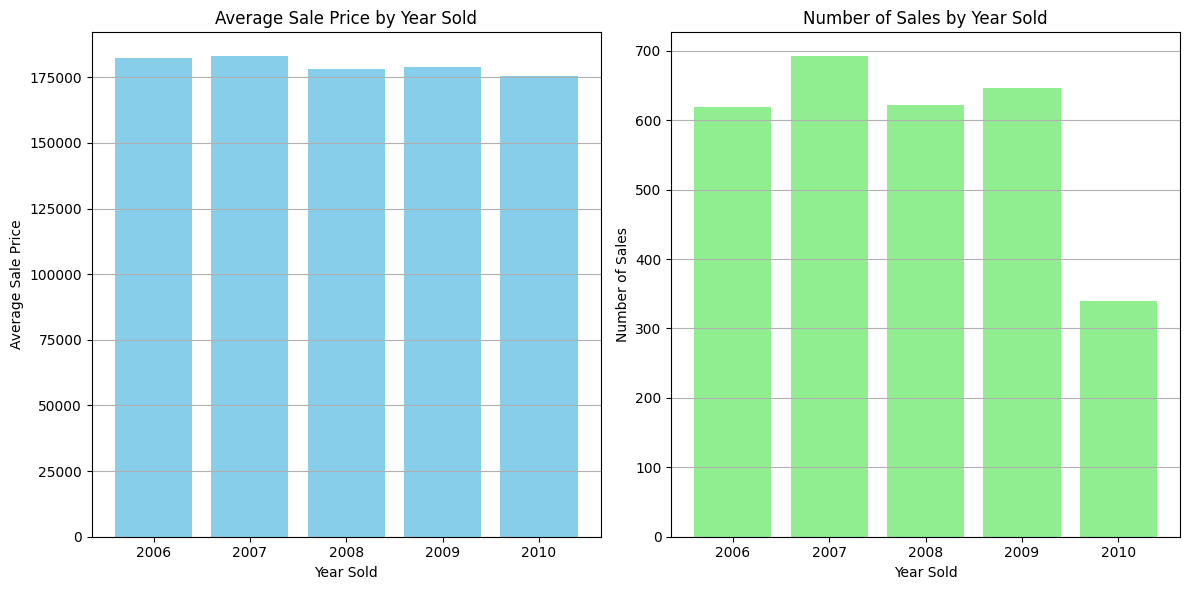

In [ ]:
mean_sale_price = df.groupby('YrSold')['SalePrice'].mean().reset_index() # Replace 'YrSold' with the correct column name

# Calculate the number of observations for each year
count_observations = df.groupby('YrSold').size().reset_index(name='Count') # Replace 'YrSold' with the correct column name

# Create a figure with two subplots (2 columns, 1 row)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart for average SalePrice
axs[0].bar(mean_sale_price['YrSold'].astype(str), mean_sale_price['SalePrice'], color='skyblue')
axs[0].set_xlabel('Year Sold')
axs[0].set_ylabel('Average Sale Price')
axs[0].set_title('Average Sale Price by Year Sold')
axs[0].grid(axis='y')

# Bar chart for number of observations
axs[1].bar(count_observations['YrSold'].astype(str), count_observations['Count'], color='lightgreen')
axs[1].set_xlabel('Year Sold')
axs[1].set_ylabel('Number of Sales')
axs[1].set_title('Number of Sales by Year Sold')
axs[1].grid(axis='y')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

## **Sales by month**

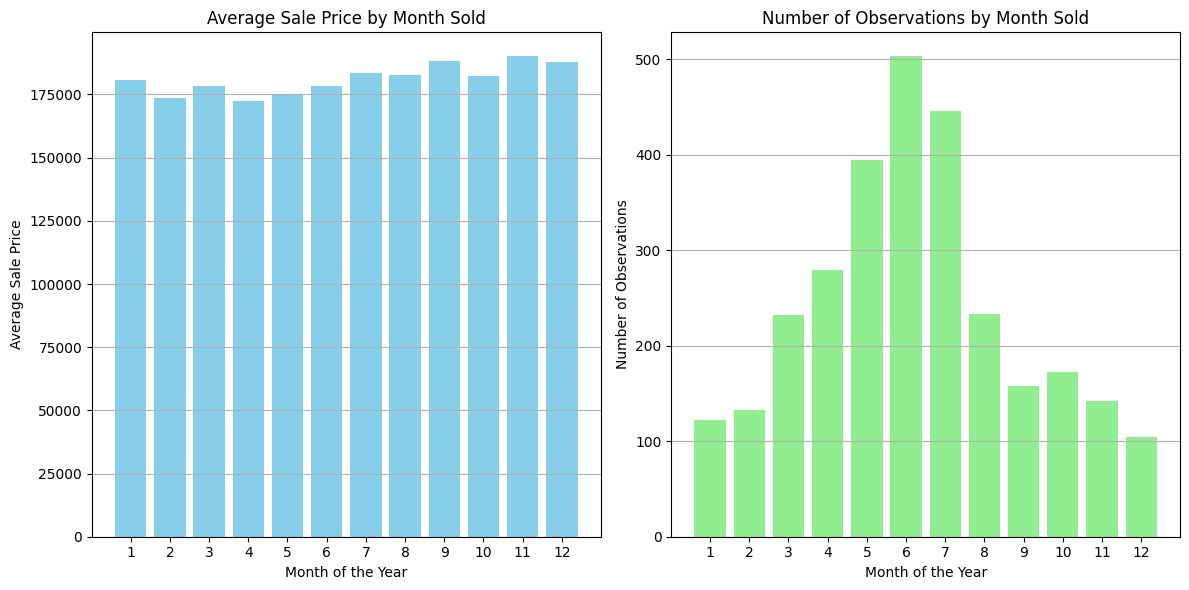

In [ ]:
# Calculate the average SalePrice for each month
mean_sale_price = df.groupby('MoSold')['SalePrice'].mean().reset_index()

# Calculate the number of observations for each month
count_observations = df.groupby('MoSold').size().reset_index(name='Count')

# Create a figure with two subplots (2 columns, 1 row)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart for average SalePrice by month
axs[0].bar(mean_sale_price['MoSold'].astype(str), mean_sale_price['SalePrice'], color='skyblue')
axs[0].set_xlabel('Month of the Year')
axs[0].set_ylabel('Average Sale Price')
axs[0].set_title('Average Sale Price by Month Sold')
axs[0].grid(axis='y')

# Bar chart for number of observations by month
axs[1].bar(count_observations['MoSold'].astype(str), count_observations['Count'], color='lightgreen')
axs[1].set_xlabel('Month of the Year')
axs[1].set_ylabel('Number of Observations')
axs[1].set_title('Number of Observations by Month Sold')
axs[1].grid(axis='y')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

## **Neighborhood is an important categorical variable**

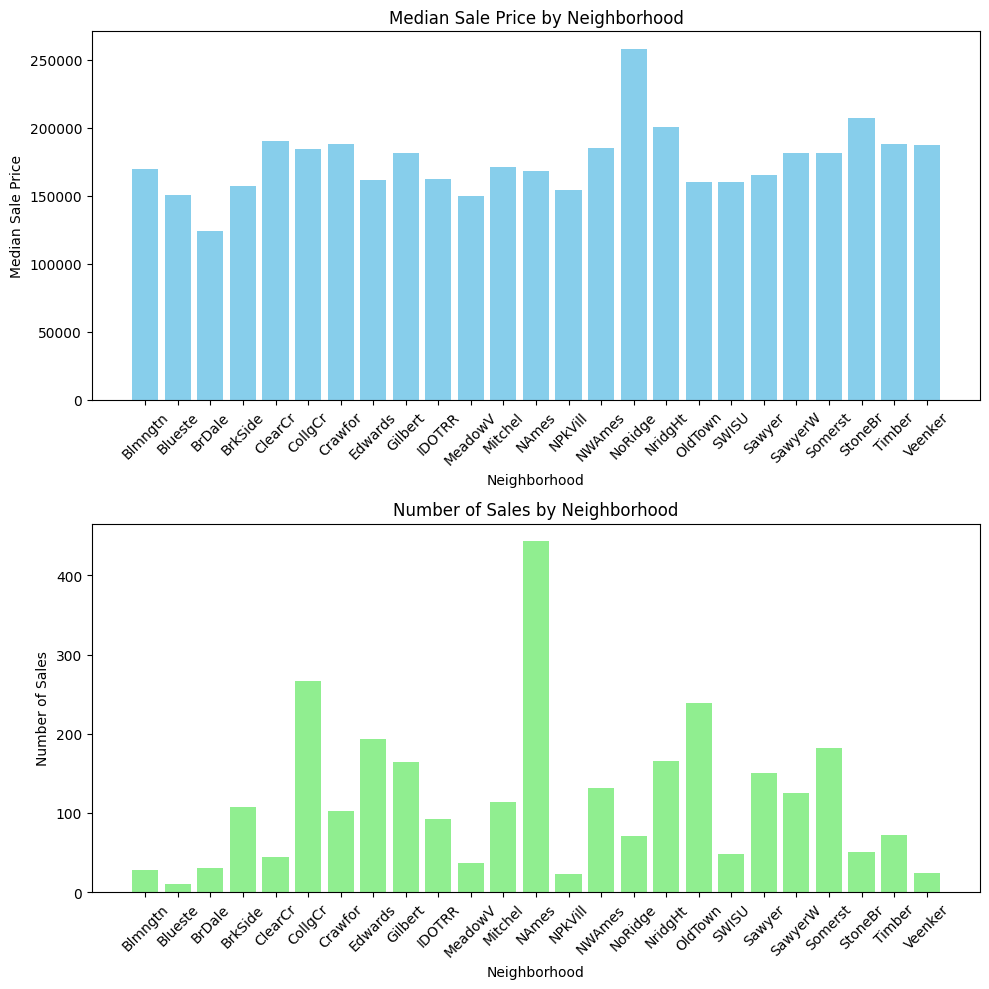

In [ ]:
# Calculate the median SalePrice for each neighborhood
median_sale_price = df.groupby('Neighborhood')['SalePrice'].median().reset_index()

# Calculate the number of sales for each neighborhood
sales_count = df.groupby('Neighborhood')['SalePrice'].count().reset_index(name='Sales Count')

# Merge the two DataFrames
combined_data = pd.merge(median_sale_price, sales_count, on='Neighborhood')

# Create a combined figure with two subplots (2 rows, 1 column)
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Bar chart for median SalePrice
axs[0].bar(combined_data['Neighborhood'], combined_data['SalePrice'], color='skyblue')
axs[0].set_xlabel('Neighborhood')
axs[0].set_ylabel('Median Sale Price')
axs[0].set_title('Median Sale Price by Neighborhood')
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-tick labels

# Bar chart for number of sales
axs[1].bar(combined_data['Neighborhood'], combined_data['Sales Count'], color='lightgreen')
axs[1].set_xlabel('Neighborhood')
axs[1].set_ylabel('Number of Sales')
axs[1].set_title('Number of Sales by Neighborhood')
axs[1].tick_params(axis='x', rotation=45)  # Rotate x-tick labels

# Adjust layout
plt.tight_layout()

# Show the combined plots
plt.show()

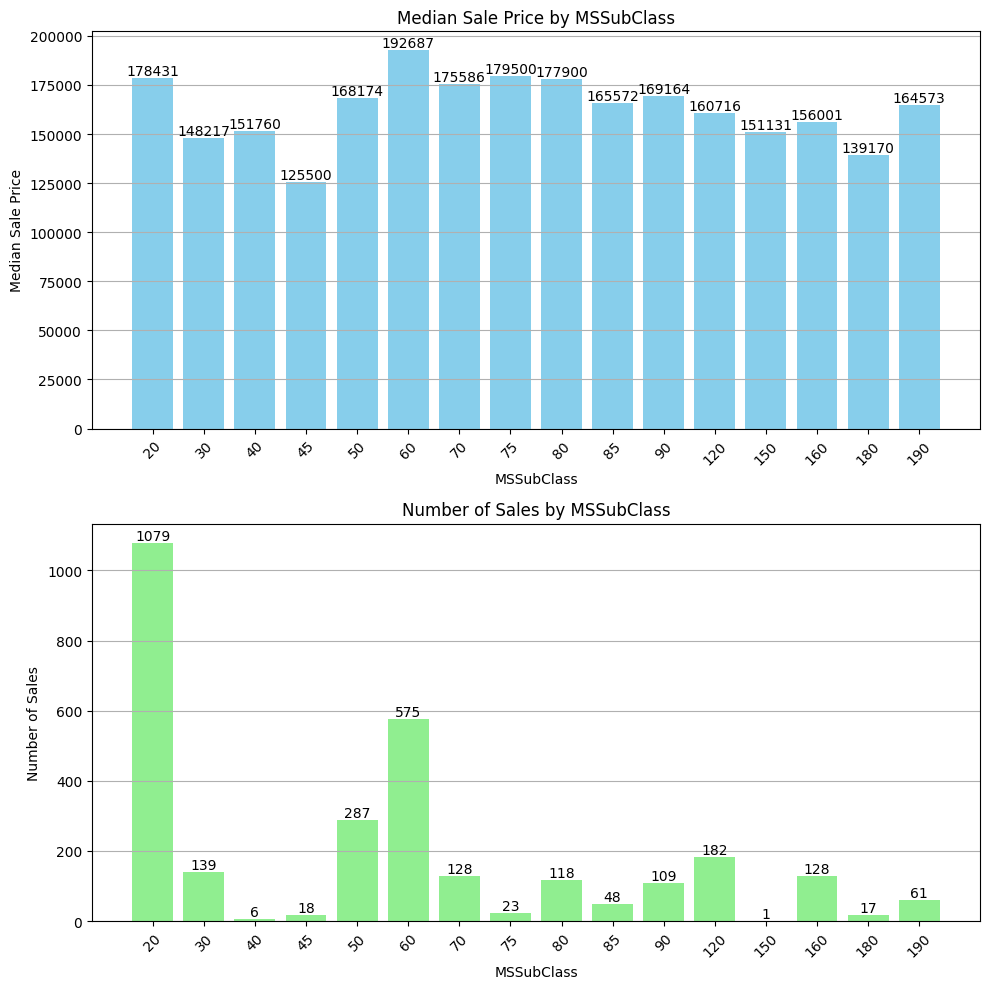

In [ ]:
# Calculate the median SalePrice for each MSSubClass
median_sale_price = df.groupby('MSSubClass')['SalePrice'].median().reset_index()

# Calculate the number of sales for each MSSubClass
sales_count = df.groupby('MSSubClass')['SalePrice'].count().reset_index(name='Sales Count')

# Merge the two DataFrames using 'MSSubClass' as the key
combined_data = pd.merge(median_sale_price, sales_count, on='MSSubClass')

# Create a combined figure with two subplots (2 rows, 1 column)
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Bar chart for median SalePrice
bar1 = axs[0].bar(combined_data['MSSubClass'].astype(str), combined_data['SalePrice'], color='skyblue')
axs[0].set_xlabel('MSSubClass')
axs[0].set_ylabel('Median Sale Price')
axs[0].set_title('Median Sale Price by MSSubClass')
axs[0].grid(axis='y')
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-tick labels

# Annotate bars for median SalePrice
for bar in bar1:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.0f}', ha='center', va='bottom')

# Bar chart for number of sales
bar2 = axs[1].bar(combined_data['MSSubClass'].astype(str), combined_data['Sales Count'], color='lightgreen')
axs[1].set_xlabel('MSSubClass')
axs[1].set_ylabel('Number of Sales')
axs[1].set_title('Number of Sales by MSSubClass')
axs[1].grid(axis='y')
axs[1].tick_params(axis='x', rotation=45)  # Rotate x-tick labels

# Annotate bars for number of sales
for bar in bar2:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.0f}', ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show the combined plots
plt.show()

## **3.1 Model Selection**

In [ ]:
# Calculate correlations between numerical variables and 'SalePrice'
cor_num_var = df.select_dtypes(include=np.number).corr() # Select only numerical columns

# Sort correlations with SalePrice in descending order
cor_sorted = cor_num_var['SalePrice'].sort_values(ascending=False)

# Select top 10 high correlations (absolute value)
top_10_cor_high = cor_sorted.head(10)  # Get the top 10

# Get the names of the top 10 variables
top_10_variable_names = top_10_cor_high.index.tolist()

# Filter the dataframe to include only the top 10 correlated variables
df_high_corr = df[top_10_variable_names]

print(df_high_corr)

      SalePrice  GrLivArea  OverallQual  TotRmsAbvGrd  GarageCars  GarageArea  \
0        208500       1710            7             8         2.0       548.0   
1        181500       1262            6             6         2.0       460.0   
2        223500       1786            7             6         2.0       608.0   
3        140000       1717            7             7         3.0       642.0   
4        250000       2198            8             9         3.0       836.0   
...         ...        ...          ...           ...         ...         ...   
2914     167081       1092            4             5         0.0         0.0   
2915     164789       1092            4             6         1.0       286.0   
2916     219222       1224            5             7         2.0       576.0   
2917     184924        970            5             6         0.0         0.0   
2918     187742       2000            7             9         3.0       650.0   

      1stFlrSF  TotalBsmtSF

In [ ]:
# Import the necessary modules and classes
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Impute missing values with the mean for each column
df_high_corr = df_high_corr.fillna(df_high_corr.mean())

num_predictors = df_high_corr.columns.drop(['SalePrice'])
# Apply MinMaxScaler to the predictors only
X = MinMaxScaler().fit_transform(df_high_corr[num_predictors])
y = df_high_corr['SalePrice']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              5630.
Date:                Sat, 05 Oct 2024   Prob (F-statistic):                        0.00
Time:                        01:49:53   Log-Likelihood:                         -35354.
No. Observations:                2919   AIC:                                  7.073e+04
Df Residuals:                    2910   BIC:                                  7.078e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## **Check correlation between predictors**


In [ ]:
corr_predictor=df_high_corr.drop(columns=['SalePrice']).corr()
print(corr_predictor)

              GrLivArea  OverallQual  TotRmsAbvGrd  GarageCars  GarageArea  \
GrLivArea      1.000000     0.575126      0.808354    0.489898    0.485434   
OverallQual    0.575126     1.000000      0.389761    0.600682    0.565065   
TotRmsAbvGrd   0.808354     0.389761      1.000000    0.358048    0.328682   
GarageCars     0.489898     0.600682      0.358048    1.000000    0.889700   
GarageArea     0.485434     0.565065      0.328682    0.889700    1.000000   
1stFlrSF       0.562538     0.479152      0.391782    0.440517    0.491985   
TotalBsmtSF    0.445167     0.549087      0.282008    0.437906    0.485984   
FullBath       0.630286     0.528483      0.527337    0.479938    0.408444   
YearBuilt      0.242666     0.597554      0.114280    0.537839    0.480525   

              1stFlrSF  TotalBsmtSF  FullBath  YearBuilt  
GrLivArea     0.562538     0.445167  0.630286   0.242666  
OverallQual   0.479152     0.549087  0.528483   0.597554  
TotRmsAbvGrd  0.391782     0.282008  0.527

## **High corr model**

In [ ]:
num_predictors2 = df_high_corr.columns.drop(['SalePrice', 'FullBath', '1stFlrSF'])
X = MS(num_predictors2).fit_transform(df_high_corr)
y = df_high_corr['SalePrice']

high_corr_model = sm.OLS(y, X)
results2 = high_corr_model.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     328.1
Date:                Sat, 05 Oct 2024   Prob (F-statistic):               0.00
Time:                        01:49:57   Log-Likelihood:                -35277.
No. Observations:                2919   AIC:                         7.057e+04
Df Residuals:                    2911   BIC:                         7.062e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept    -2.382e+05   6.75e+04     -3.528   

## **Check model prediction**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model
lr_model_high_corr = LinearRegression()
lr_model_high_corr.fit(X_train, y_train)

# Make predictions
y_pred = lr_model_high_corr.predict(X_test)

# Display the predictions
predictions_df_high_corr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df_high_corr)

      Actual      Predicted
2437  180097  143915.226443
2470  192687  196556.715023
2359  158152  140594.040550
789   187500  202047.187938
1642  172024  214179.130264
...      ...            ...
2880  209450  167902.247846
2295  195159  232509.702430
2222  211492  227162.980839
1090   92900  122031.741539
542   213250  208209.053663

[584 rows x 2 columns]


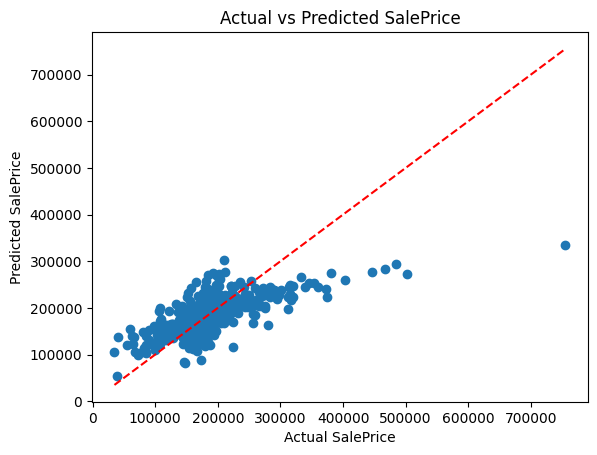

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')

# Plot a diagonal line for reference
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.show()


## **All variable model**

In [ ]:
numerical_and_boolean_df = df.select_dtypes(include=['number', 'bool'])
allvar = numerical_and_boolean_df.columns.drop(['SalePrice'])
X = MS(allvar).fit_transform(numerical_and_boolean_df)
y = df['SalePrice']

model6 = sm.OLS(y, X)
results6 = model6.fit()
print(results6.summary())

MissingDataError: exog contains inf or nans

Drop insignificant predictors

In [ ]:
# Extract significant variables based on p-values less than 0.05
significant_vars = results6.pvalues[results6.pvalues < 0.05].index.tolist()

# Create a new DataFrame with only significant predictors
significant_X = X[significant_vars]

# Print the DataFrame with significant predictors
print(significant_X)

KeyError: "['LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'Condition1_PosN', 'Condition2_Artery', 'Condition2_Norm', 'Condition2_PosA', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_WdShngl', 'Exterior1st_VinylSd', 'Exterior2nd_Other', 'MasVnrType_Stone', 'FireplaceQu_Ex', 'PoolQC_Ex', 'MiscFeature_Gar2', 'SaleType_WD', 'MoSold_12.0', 'YearBuilt_1893.0', 'YearBuilt_1914.0', 'YearBuilt_1918.0', 'YearBuilt_1920.0', 'YearBuilt_1995.0', 'YearBuilt_1996.0', 'YearBuilt_2001.0', 'YearBuilt_2008.0', 'YearBuilt_2009.0'] not in index"

Models with all significant predictors

In [ ]:
allvars = significant_X.columns
X = MS(allvars).fit_transform(significant_X)
y = df['SalePrice']

model7 = sm.OLS(y, X)
results7 = model7.fit()
print(results7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     78.83
Date:                Sat, 05 Oct 2024   Prob (F-statistic):               0.00
Time:                        01:41:42   Log-Likelihood:                -35066.
No. Observations:                2919   AIC:                         7.021e+04
Df Residuals:                    2879   BIC:                         7.045e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept            -2.837e+04 

## **3.2: Model prediction**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(significant_X, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Display the predictions
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df)

        Actual      Predicted
2437  180097.0  148631.566883
2470  192687.0  213749.108328
2359  158152.0  134476.830275
789   187500.0  217378.391950
1642  172024.0  186309.976633
...        ...            ...
2880  209450.0  169993.803656
2295  195159.0  228260.033871
2222  211492.0  244394.531806
1090   92900.0   94007.813517
542   213250.0  193519.666791

[584 rows x 2 columns]


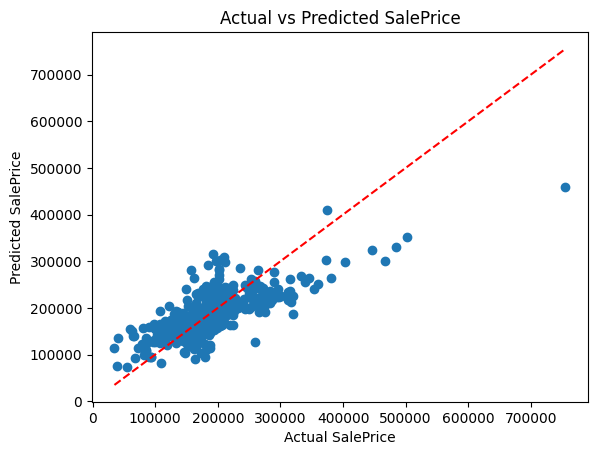

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')

# Plot a diagonal line for reference
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.show()

## **1. Histogram of Sale Prices**


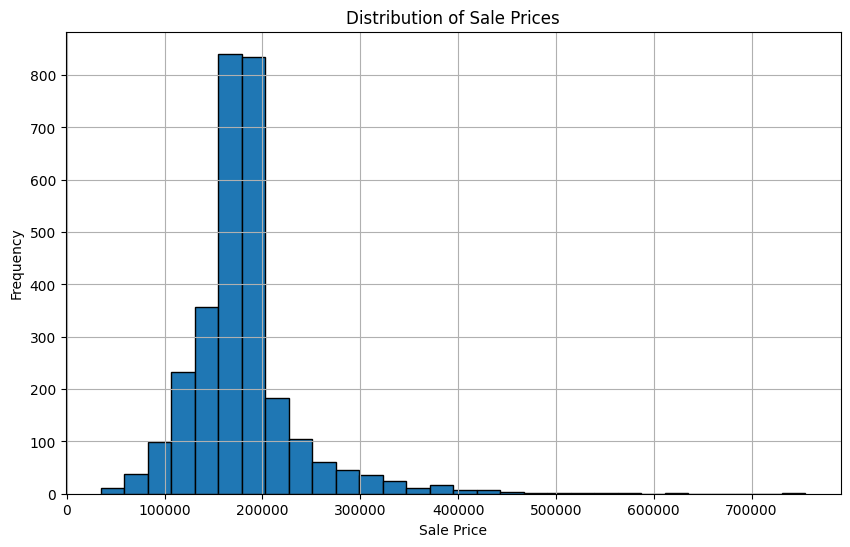

In [ ]:
import matplotlib.pyplot as plt

# 1. Histogram of Sale Prices
plt.figure(figsize=(10, 6))
plt.hist(df['SalePrice'], bins=30, edgecolor='black')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## **2. Box Plot of Sale Price by Neighborhood**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


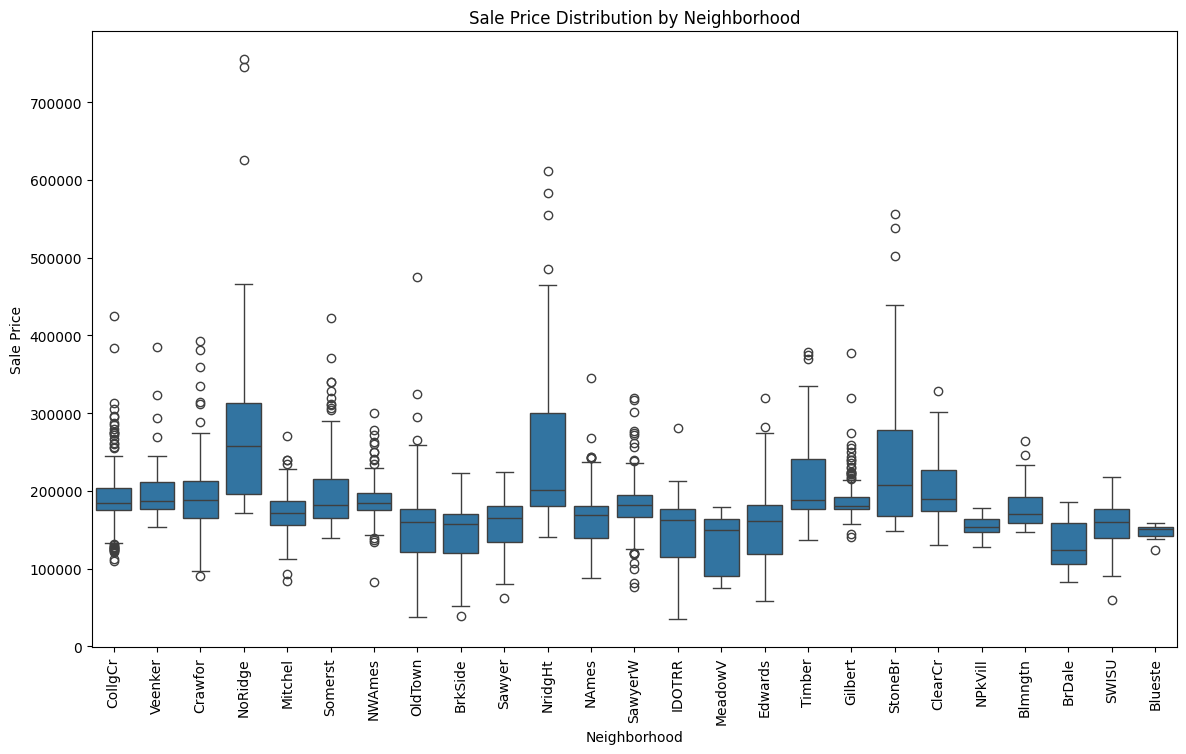

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Box Plot of Sale Price by Neighborhood (categorical variable)
plt.figure(figsize=(14, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.xticks(rotation=90)
plt.title('Sale Price Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.show()


## **3. Actual vs Predicted Sale Price Scatter Plot**


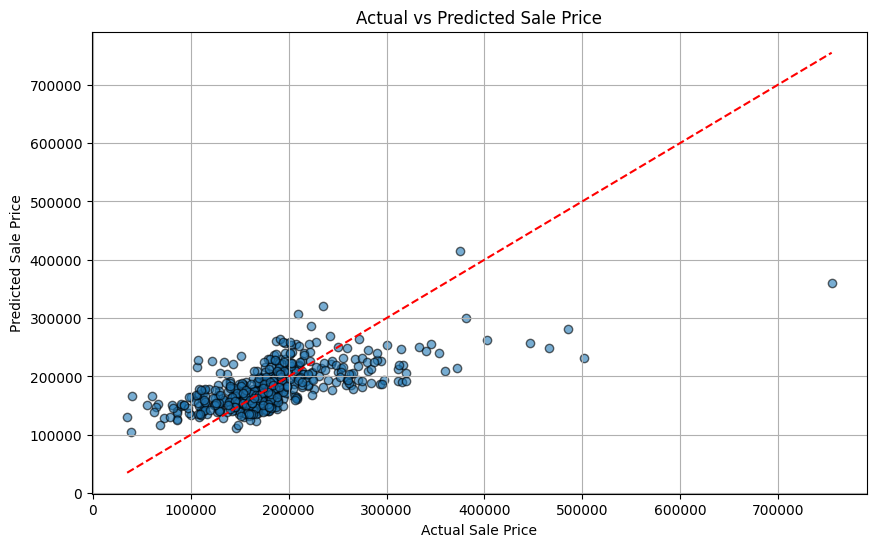

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming 'df' has the predictors and target variable defined
X = df[['GrLivArea', 'LotArea']]  # Predictors
y = df['SalePrice']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='black', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.grid(True)
plt.show()